# Pie chart for occurrence of POS's 
---

In [20]:
import Read_data_and_Write_results as rw
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
pos_vocab = rw.read_data("train.txt")[5]

In [4]:
pos_vocab = [item for innerlist in pos_vocab for item in innerlist]

In [5]:
pos_counter = {"V": 0, "J": 0, "N": 0, "R": 0, "Other": 0}
for pos in pos_vocab:
    if pos[0] in pos_counter.keys():
        pos_counter[pos[0]] += 1
    else:
        pos_counter["Other"] += 1

In [6]:
print(pos_counter)

{'V': 6212, 'J': 1984, 'N': 6820, 'R': 2016, 'Other': 15368}


In [7]:
def pie_fig(items):
    labels = items.keys()
    sizes = items.values()
    explode = (0, 0, 0.1, 0, 0)
    fig1, ax1 = plt.subplots(figsize = (5,5))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

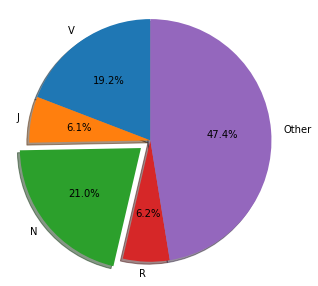

In [8]:
pie_fig(pos_counter)

# Scatter for occerrence and probability of words
---

In [9]:
from collections import defaultdict
from nltk.stem import PorterStemmer as stemmer

In [10]:
_,word_vocab,_,_,word_probs ,_ = rw.read_data("train.txt")

In [11]:
words_vocab = [stemmer().stem(word.lower()) for innerlist in word_vocab for word in innerlist]

bold_occurrences_word = defaultdict(int)
for i in range(len(word_vocab)):
    max_indx , max_value = -1, 0
    for j in range(len(word_vocab[i])):
        word_prob = float(word_probs[i][j])
        if max_value < word_prob:
            max_value, max_indx = word_prob , j
    bold_occurrences_word[stemmer().stem(word_vocab[i][max_indx].lower())] += 1

In [12]:
occurrences_word = defaultdict(int)
for word in words_vocab:
    occurrences_word[word] += 1

In [13]:
def calculate_freqs_probs(bold_occurrences_item, occurrences):
    probs, freqs , items = [],[],[]
    for item ,bold_freq in bold_occurrences_item.items():
        if occurrences[item] > 20 and (bold_freq/occurrences[item])*100 > 10:
            probs.append( (bold_freq/occurrences[item])* 100)
            freqs.append(occurrences[item])
            items.append(item)
    return probs, freqs, items

In [23]:
def scatter_plot(x, y, labels, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    for i, word in enumerate(labels):
        ax.annotate(word, (x[i], y[i]))
    plt.xlim(0, 400)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

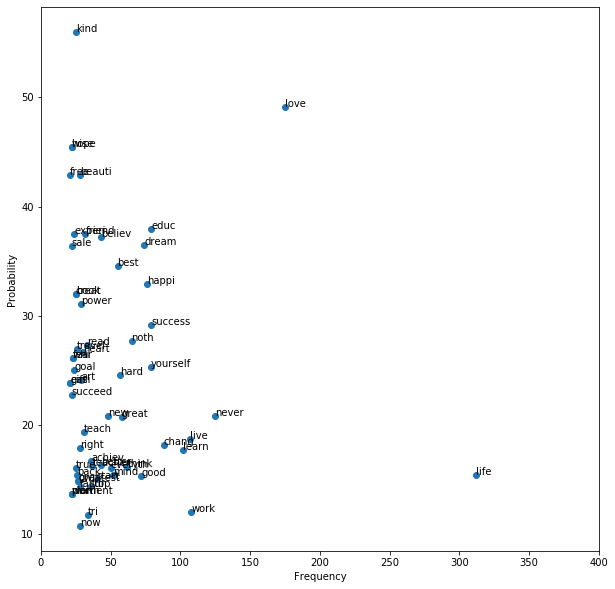

In [24]:
probs, freqs, words = calculate_freqs_probs(bold_occurrences_word,occurrences_word)
scatter_plot(freqs,probs, words, "Frequency", "Probability")

# Scatter for occurrenece and bold_freq of words 

In [16]:
_, word_lsts, _, bio_freqs, _, _  = rw.read_data("train.txt")

In [17]:
bio_freqs_word = defaultdict(int)
for i in range(len(bio_freqs)):
    for j in range(len(bio_freqs[i])):
        bio = bio_freqs[i][j].split("|")
        word_stem = stemmer().stem(word_lsts[i][j].lower())
        bio_freqs_word[word_stem] += (int(bio[0]) + int(bio[1]))

In [27]:
bios_probs, words_freq, words = [], [], []
for key, value in bio_freqs_word.items():
    if value < 1000 and value > 50:
        if occurrences_word[key] > 50 and occurrences_word[key] < 400:
            bios_probs.append((value/(occurrences_word[key]*9))*100)
            words_freq.append(occurrences_word[key])
            words.append(key)

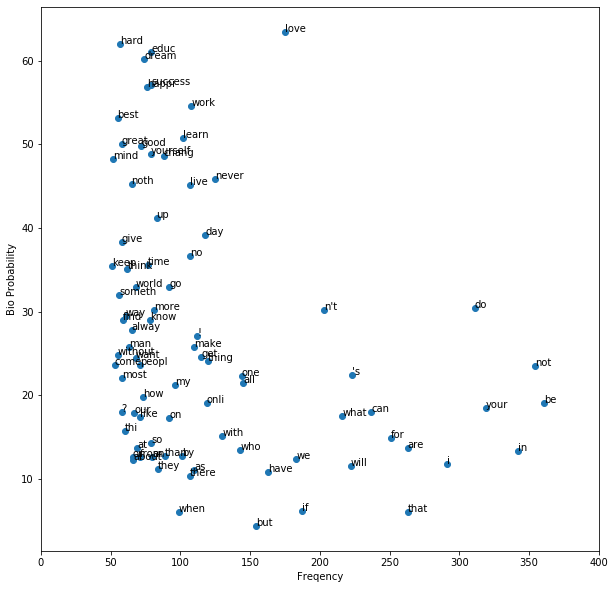

In [28]:
scatter_plot(words_freq, bios_probs, words, "Freqency", "Bio Probability")